In [ ]:
## Zadanie 1
Wykonaj algorytm k-menas na poniższych danych z $k=2$.

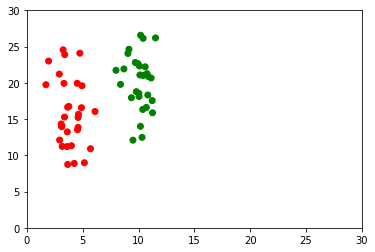

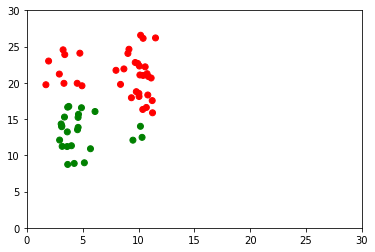

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from sklearn.cluster import KMeans #

rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
#labels = np.repeat([0,1],n)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

kmeans = KMeans(n_clusters=2) #
kmeans.fit(points) #
labels = kmeans.labels_ #

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

# Zadanie 2
Przeskaluj poniższe dane tak by odchylenie standardowe na każdej z osi było równe 1.
Możesz użyć
```python
from sklearn.preprocessing import StandardScaler
```

a następnie wykonaj algorytm k-menas z $k=2$.

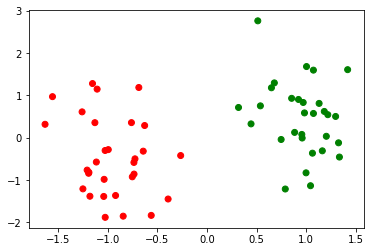

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)

points = StandardScaler().fit(points).transform(points)
kmeans = KMeans(n_clusters=2)
kmeans.fit(points)
labels = kmeans.labels_

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.show()

# Zadanie 3
Narysuj dane iris data wybierając dwie pierwsze współrzędne.
Wykonaj klastrowanie algorytmem k-means na danych iris:

  * bez skalowania i $k=3$
  * ze skalowaniem i $k=3$ 

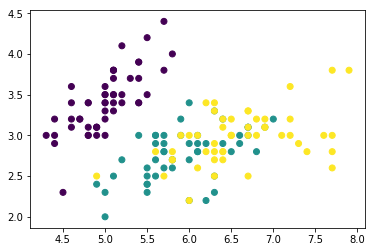

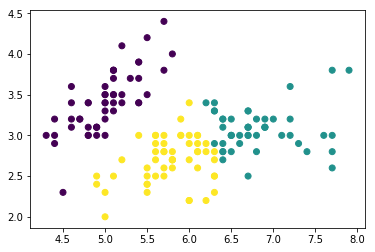

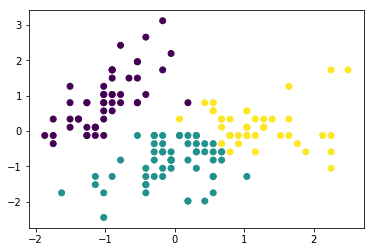

In [11]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

X = StandardScaler().fit(X).transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()


# Zadanie 4
Wykonaj klastrowanie k-means na danych iris z ilością grup (k=1,2,3,4,5,6) oraz narysuj wykres jak zmienia się suma kwadratów odległości od centrów grup (Sum of distances of samples to their closest cluster center) w zależności od ilości grup.

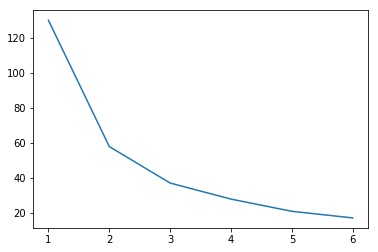

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
sq = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sq.append(kmeans.inertia_)
plt.plot([1,2,3,4,5,6], sq)
plt.show()

# Zadanie 5
Wykonaj klastrowanie k-means na danych iris z ilością grup (k=1,2,3,4,5,6) oraz oceń ich jakość za pomocą miary Adjusted Rand index
http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation.

In [14]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
sq = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sq.append(metrics.adjusted_rand_score(y, kmeans.labels_) )
print(sq)

[0.0, 0.32297823811082765, 0.60068610214845419, 0.36789432923156351, 0.36327052306305346, 0.35511396096031589]


# Zadanie 6

Wykonaj klastrowanie k-means na danych uzyskanych z obrazu (segmentacja). Każdy piksel reprezentuj jako punkt w R^5 gdzie pierwsze 3 współrzędne to odpowiednio kolory RGB a ostatnie dwie to położenie piksela na obrazku. Narysuj obrazek po segmentacji kolorując piksele w grupach jednym kolorem.
Wykonaj algorytm:

  * zes kalowaniem
  * bez skalowania

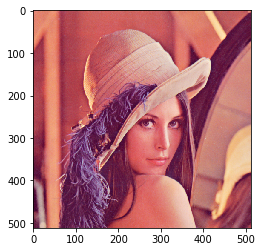

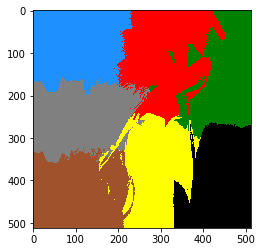

In [22]:
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
im = Image.open("lena.png")
pix = im.load()

plt.imshow(im)
plt.show()

X = []
colors = [(0,0,0),(30,144,255),(255,255,0),(255,0,0),(128,128,128),(0,128,0),(160,82,45)]
for i in range(im.size[0]):
    for j in range(im.size[1]):
        X.append(pix[i,j] + (i,j,))
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
labels = kmeans.labels_
n = im.size[0] * im.size[1]
for i in range(n):
    pix[X[i][3], X[i][4]] = colors[labels[i]]

plt.imshow(im)
plt.show()

# Zadanie 7

Ściągnij bazę twarzy fetch_olivetti_faces i wyświetl kilka twarzy.

## Troszkę podpowiedzi

Baza danych zdjęć ( więcej informacji )

In [20]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
#print(faces.DESCR)

Looking at the content of the faces object, we get the following properties: images, data, and target. Images contain the 400 images represented as 64 x 64 pixel matrices. data contains the same 400 images but as array of 4096 pixels. target is, as expected, an array with the target classes, ranging from 0 to 39.


In [21]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


Dane są już znormalizowane.

In [22]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.547043


Spróbujmy narysować nasze dane.

In [23]:
import matplotlib.pyplot as plt
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)

        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    plt.show()

I wywołanie funkcji:

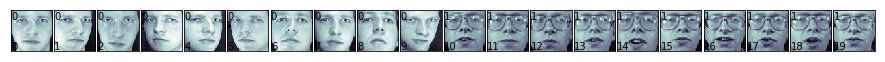

In [16]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)

        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    plt.show()

faces = fetch_olivetti_faces()
print_faces(faces.images, faces.target, 20)

# Zadanie 8

Wykonaj klastrowanie k-means na danych z poprzedniego zadania z ilością grup (k=1,2,3,4,5,6) oraz oceń ich jakość za pomocą miary Adjusted Rand index.

In [17]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn import metrics
faces = fetch_olivetti_faces()
y = faces.target

sq = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(faces.data)
    sq.append(metrics.adjusted_rand_score(y, kmeans.labels_) )
print(sq)

[0.0, 0.024861752777636748, 0.042572069889467296, 0.062506449465171462, 0.078005386293712786, 0.092637524380759534]


# Zadanie 9

Ściągnij bazę pisanych cyfr handwritten digits data i wyświetl kilka z nich.


In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


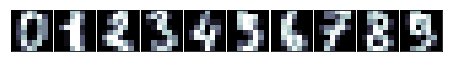

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def print_digits(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
    plt.show()

digits = load_digits()
print_digits(digits.images, digits.target, 10)

# Zadanie 10

Wykonaj klastrowanie k-means na danych z poprzedniego zadania z ilością grup (k=1,2,3,4,5,6) oraz oceń ich jakość za pomocą miary Adjusted Rand index.

In [20]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics
digits = load_digits()
y = digits.target

sq = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(digits.data)
    sq.append(metrics.adjusted_rand_score(y, kmeans.labels_) )
print(sq)

[0.0, 0.13805102113441284, 0.22145658297585091, 0.28350528959595195, 0.39118154484800355, 0.43707238643414126]
